In [26]:
""" A continuación vamos a importar una serie de librerías que tenemos ya instaladas 
    para realizar los DataFrames y los gráficos de criptomonedas
a partir de la librería de Yahoo Finance (yfinance). """

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt



In [40]:
# Lista de criptomonedas por Ticker 

cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD', 'ADA-USD']

In [41]:
""" Vamos a llamar a nuestra librería de Yahoo Finance y vamos a trabajar con períodos de dos años
    para comprobar los datos y más tarde montar los gráficos. """

data = yf.download(cryptocurrencies, start='2021-01-01',
                end='2022-03-01')
data.info()

[*********************100%***********************]  4 of 4 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2020-12-31 to 2022-02-28
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ADA-USD)  425 non-null    float64
 1   (Adj Close, BNB-USD)  425 non-null    float64
 2   (Adj Close, BTC-USD)  425 non-null    float64
 3   (Adj Close, ETH-USD)  425 non-null    float64
 4   (Close, ADA-USD)      425 non-null    float64
 5   (Close, BNB-USD)      425 non-null    float64
 6   (Close, BTC-USD)      425 non-null    float64
 7   (Close, ETH-USD)      425 non-null    float64
 8   (High, ADA-USD)       425 non-null    float64
 9   (High, BNB-USD)       425 non-null    float64
 10  (High, BTC-USD)       425 non-null    float64
 11  (High, ETH-USD)       425 non-null    float64
 12  (Low, ADA-USD)        425 non-null    float64
 13  (Low, BNB-USD)        425 non-null   

In [42]:
data.head()

Adj Close                                           Close  \
             ADA-USD    BNB-USD       BTC-USD      ETH-USD   ADA-USD   
Date                                                                   
2020-12-31  0.181397  37.376034  29001.720703   737.803406  0.181397   
2021-01-01  0.175350  37.905010  29374.152344   730.367554  0.175350   
2021-01-02  0.177423  38.241592  32127.267578   774.534973  0.177423   
2021-01-03  0.204995  41.148979  32782.023438   975.507690  0.204995   
2021-01-04  0.224762  40.926353  31971.914062  1040.233032  0.224762   

                                                      High             ...  \
              BNB-USD       BTC-USD      ETH-USD   ADA-USD    BNB-USD  ...   
Date                                                                   ...   
2020-12-31  37.376034  29001.720703   737.803406  0.185749  38.163254  ...   
2021-01-01  37.905010  29374.152344   730.367554  0.184246  38.928177  ...   
2021-01-02  38.241592  32127.267578   774.534973  0.184253  38.836254  ...   
2021-01-03  41.148979  32782.023438   975.507690  0.208679  41.606323  ...   
2021-01-04  40.926353  31971.914062  1040.233032  0.239661  43.132122  ...   

                     Low                  Open                           \
                 BTC-USD     ETH-USD   ADA-USD    BNB-USD       BTC-USD   
Date                                                                      
2020-12-31  28201.992188  726.511902  0.184034  38.122288  28841.574219   
2021-01-01  28803.585938  719.792236  0.181382  37.374573  28994.009766   
2021-01-02  29091.181641  718.109497  0.175359  37.917107  29376.455078   
2021-01-03  32052.316406  771.561646  0.177382  38.253727  32129.408203   
2021-01-04  28722.755859  912.305359  0.205236  41.198280  32810.949219   

                            Volume                                       
               ETH-USD     ADA-USD    BNB-USD      BTC-USD      ETH-USD  
Date                                                                     
2020-12-31  751.626648  1132268397  404140896  46754964848  13926846861  
2021-01-01  737.708374  1122218004  459165743  40730301359  13652004358  
2021-01-02  730.402649  1408849504  521965394  67865420765  19740771179  
2021-01-03  774.511841  2303857909  758008613  78665235202  45200463368  
2021-01-04  977.058838  3260699086  807877171  81163475344  56945985763  

[5 rows x 24 columns]

In [44]:
# Comprobamos si hay datos que se han podido perder.
data.isnull().any()

Adj Close  ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
Close      ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
High       ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
Low        ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
Open       ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
Volume     ADA-USD    False
           BNB-USD    False
           BTC-USD    False
           ETH-USD    False
dtype: bool

In [48]:
adj_close = data['Adj Close']
adj_close

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2020-12-31,0.181397,37.376034,29001.720703,737.803406
2021-01-01,0.175350,37.905010,29374.152344,730.367554
2021-01-02,0.177423,38.241592,32127.267578,774.534973
2021-01-03,0.204995,41.148979,32782.023438,975.507690
2021-01-04,0.224762,40.926353,31971.914062,1040.233032
...,...,...,...,...
2022-02-24,0.853425,361.234650,38332.609375,2598.067139
2022-02-25,0.898027,374.914948,39214.218750,2764.535645
2022-02-26,0.887918,373.638763,39105.148438,2781.111816


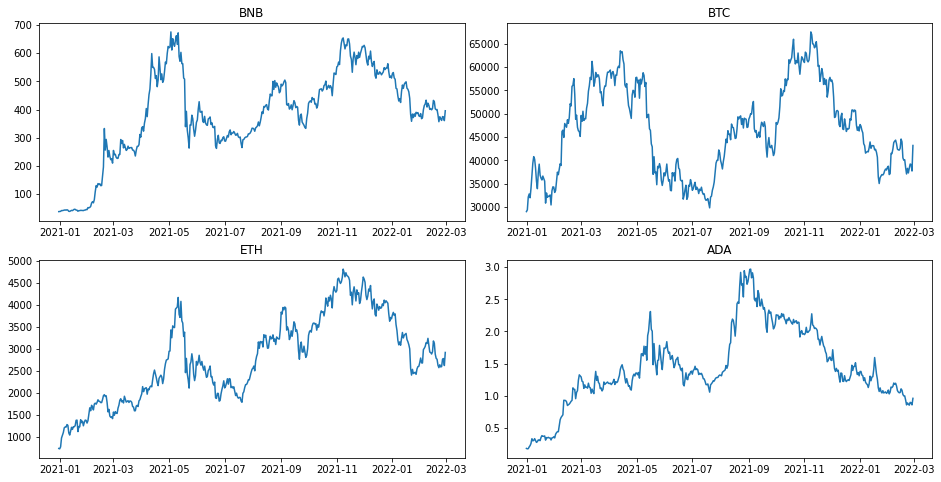

In [49]:
# Vamos a realizar una serie de subplots de las criptomonedas principales filtrando el precio de cierre del día 

fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['ADA-USD'])
axs[1,1].set_title('ADA')
plt.show()

In [50]:
# Devuelve el cambio porcentual en el precio de cierre ajustado (Adj Close) y elimina la primera fila con NA.
returns = adj_close.pct_change().dropna(axis=0)
returns.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2021-01-01,-0.033336,0.014153,0.012842,-0.010078
2021-01-02,0.011822,0.008880,0.093726,0.060473
2021-01-03,0.155403,0.076027,0.020380,0.259475
2021-01-04,0.096427,-0.005410,-0.024712,0.066350
2021-01-05,0.149278,0.019749,0.063197,0.057461


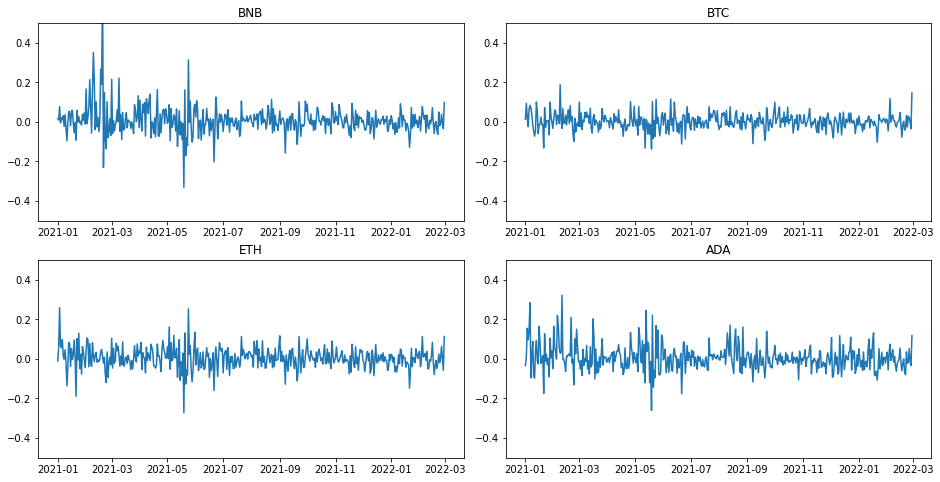

In [51]:
# Graficamos a través de un subplot los precios de retorno de nuestras 4 criptos.

""" El retorno sobre la inversión es un indicador que mide la relación entre la ganancia obtenida
    y la inversión de un negocio. Se lo conoce como ROI por sus siglas en inglés """

    
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['ADA-USD'])
axs[1,1].set_title('ADA')
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

In [21]:
# Volatilidad, desviación estándar de los retornos 

returns.std()

ADA-USD    0.063717
BNB-USD    0.064939
BTC-USD    0.040185
ETH-USD    0.053177
dtype: float64

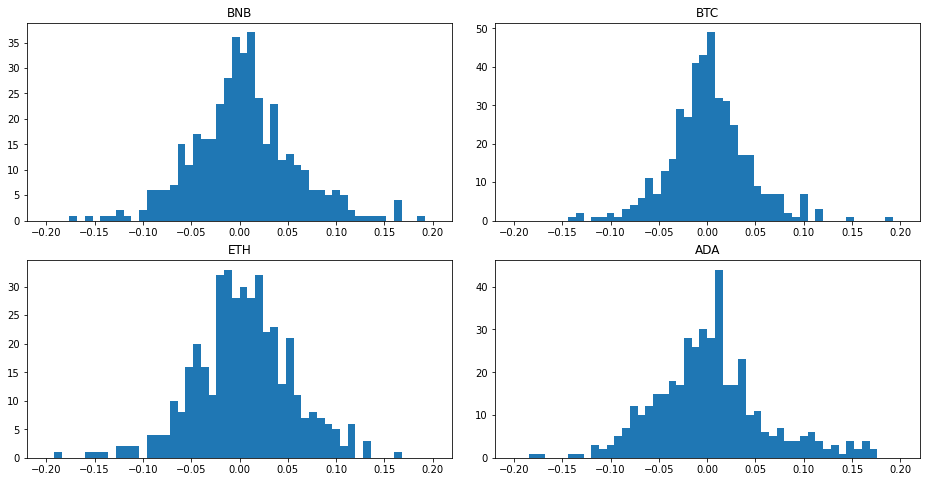

In [184]:
""" Aquí vamos a sacar el histograma a través de un subplot de todas las criptomonedas con el formato adecuado. """

fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['BNB-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BNB')
axs[0,1].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BTC')
axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['ADA-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('ADA')
plt.show()

In [23]:
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2020-01-01,1.866331,-0.280886,0.091403,0.919018
2020-01-02,-0.286193,-5.103798,-2.893251,-1.697910
2020-01-03,4.064542,-0.489452,2.103052,3.518881
2020-01-04,5.328055,1.193722,3.017372,4.211462
2020-01-05,5.711665,2.792738,3.026555,5.143029


Text(0.5, 1.0, 'Cumulative Returns')

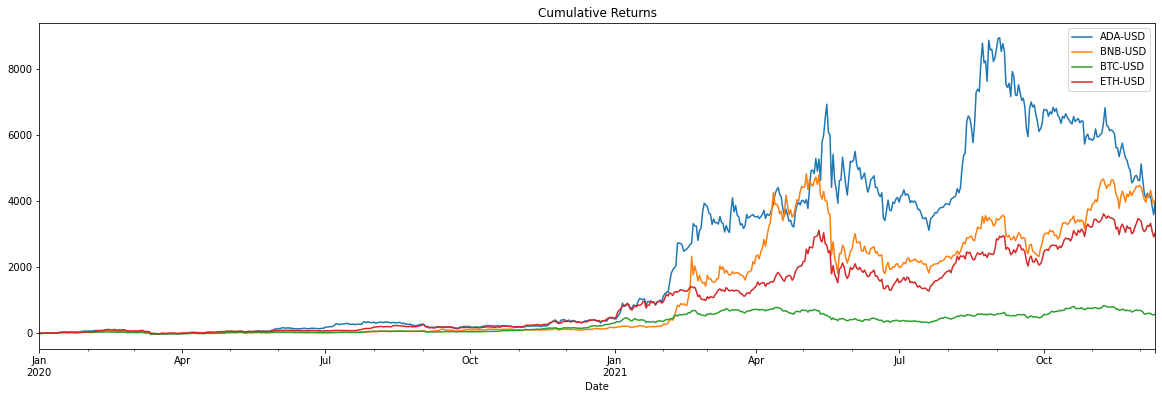

In [27]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns');


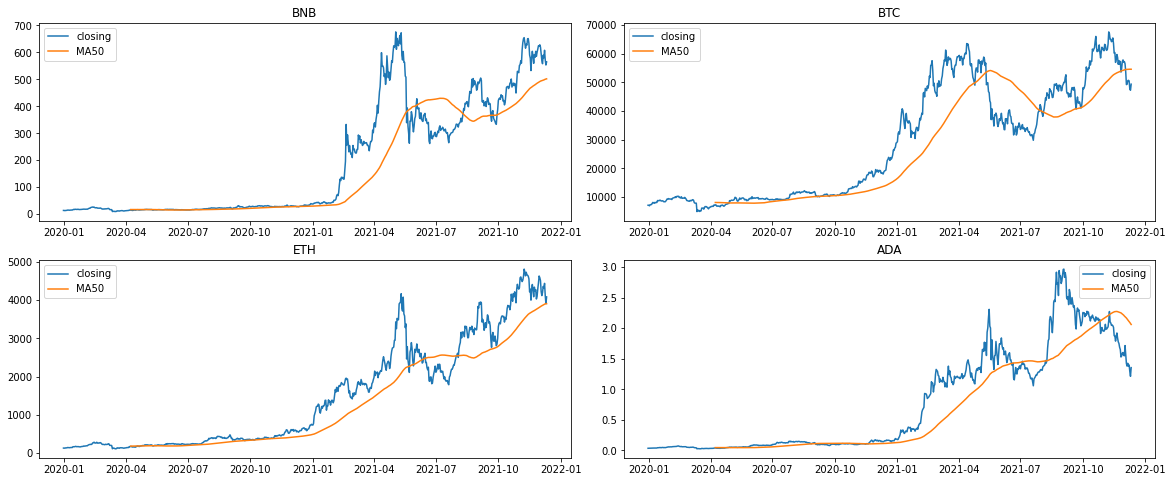

In [29]:
# Vamos a declarar una variable para implementar una media móvil a corto plazo de 20 días.
MA20 = adj_close.rolling(20).mean()
# Vamos a declarar una variable para implementar una media móvil a largo plazo de 50 días.
MA50 = adj_close.rolling(50).mean()
# Vamos a declarar una variable para implementar una media móvil a largo plazo de 100 días.
MA100 = adj_close.rolling(100).mean()
# Hacemos un subplot de todos los gráficos con sus medias móviles de 50 días.

fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close['BNB-USD'], label= 'closing')
axs[0,0].plot(MA50['BNB-USD'], label= 'MA50')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,1].plot(MA50['BTC-USD'], label= 'MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(adj_close['ETH-USD'], label= 'closing')
axs[1,0].plot(MA50['ETH-USD'], label= 'MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(adj_close['ADA-USD'], label= 'closing')
axs[1,1].plot(MA50['ADA-USD'], label= 'MA50')
axs[1,1].set_title('ADA')
axs[1,1].legend()
plt.show()

In [30]:
# Vamos a comprobar las correlaciones
returns.corr()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
ADA-USD,1.000000,0.570272,0.630451,0.698924
BNB-USD,0.570272,1.000000,0.641324,0.658469
BTC-USD,0.630451,0.641324,1.000000,0.793517
ETH-USD,0.698924,0.658469,0.793517,1.000000


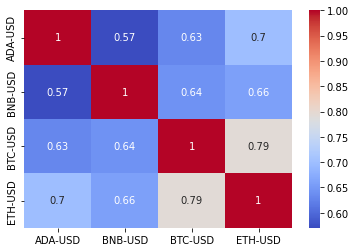

In [31]:
# Hacemos plotly de correlaciones para dejarlo más visual

sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

In [144]:
import pandas as pd
import numpy as np
import requests
import csv
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
""" Vamos a ver en gráficas mucho más amplias con la fecha en el eje X y el precio en el eje Y.
    Para ello vamos a crear nuestro dataset de las criptomonedas principales donde se va a basar
    nuestro estudio. """

symbol = 'BTCUSDT'   # Esta variable la tendremos que ir editando para comprobar las gráficas de cada una de las criptomonedas introduciendo el ticker.
tick_interval = '1d'

In [120]:
""" Vamos a ir llamando a las funciones de nuestro archivo graficas_criptos.py para representar gráficamente las criptomonedas principales. """

from GRÁFICAS_CRIPTOS import obtener_velas, obtener_velas_inicio

In [121]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']

bitcoin = pd.DataFrame(velas, columns=columns)

In [122]:
def obtener_velas(start='', symbol='BTCUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]


def obtener_velas_inicio(symbol, tick_interval):  # Devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1666
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1667 non-null   float64
 1   open              1667 non-null   float64
 2   high              1667 non-null   float64
 3   low               1667 non-null   float64
 4   close             1667 non-null   float64
 5   volume            1667 non-null   float64
 6   close_time        1667 non-null   float64
 7   quote             1667 non-null   float64
 8   trades            1667 non-null   float64
 9   takers_buy_base   1667 non-null   float64
 10  takers_buy_quote  1667 non-null   float64
 11  ignore            1667 non-null   float64
dtypes: float64(12)
memory usage: 169.3 KB


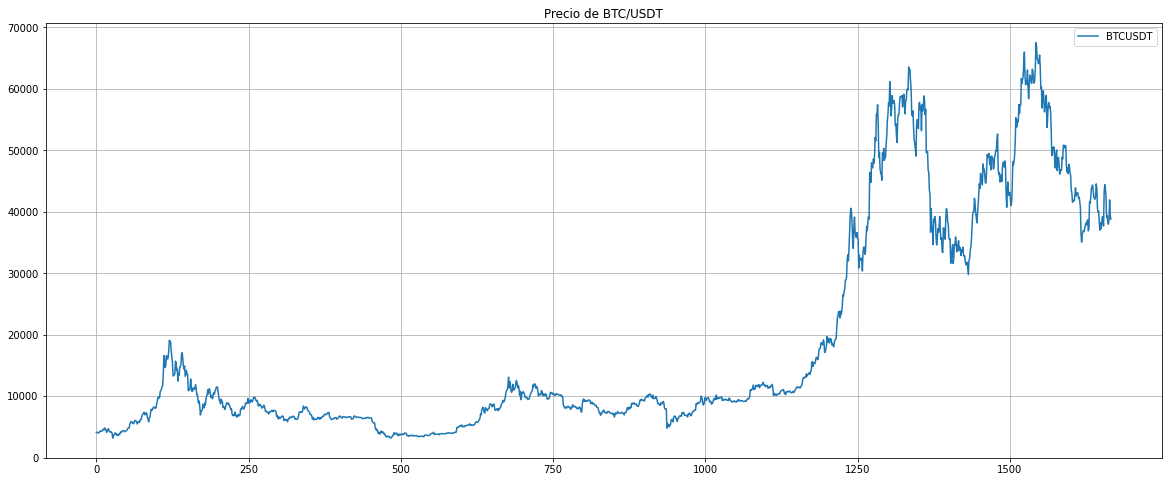

In [123]:

velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
bitcoin = pd.DataFrame(velas, columns=columns)
bitcoin = bitcoin.sort_values('close_time')
bitcoin.drop_duplicates(keep='last')
bitcoin = bitcoin.astype(float)
bitcoin.info()
bitcoin['close'].plot(figsize=(20,8), label='BTCUSDT')
plt.title('Precio de BTC/USDT')
plt.legend()
plt.grid()


In [124]:
bitcoin['close_time'] = pd.to_datetime(bitcoin['close_time'], unit='ms')
bitcoin['close_time'] = bitcoin['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
bitcoin = bitcoin.set_index('close_time')

In [125]:
bitcoin.drop('ignore', axis=1, inplace=True)

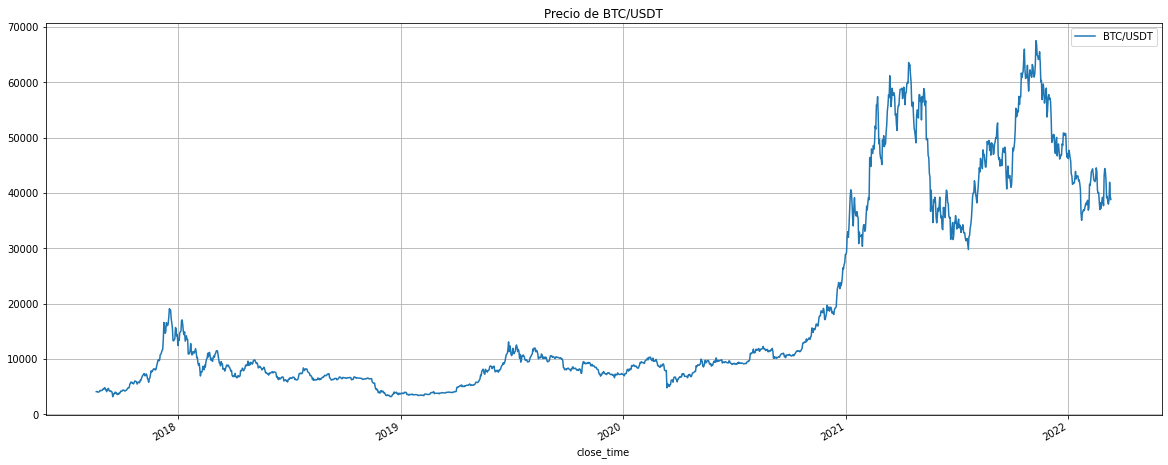

In [137]:
bitcoin['close'].plot(figsize=(20,8), label='BTC/USDT')
plt.title('Precio de BTC/USDT')
plt.legend()
plt.grid()

In [109]:
symbol = 'AVAUSDT'
tick_interval = '1d'

In [110]:
def get_candles(start='', symbol='AVAUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    candles = requests.get(base_url + endpoint + query).json()
    
    return candles, candles[-1][6]

In [111]:
def get_all_candles_from_start(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = get_candles(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    candles = []
    while start < last_time:
        i_candles, next_hop = get_candles(start, symbol, tick_interval)
        candles = candles + i_candles
        start = next_hop
        
    return candles

In [112]:
candles = get_all_candles_from_start(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
ava = pd.DataFrame(candles, columns=columns)

In [113]:
ava = ava.sort_values('close_time')
ava.drop_duplicates(keep='last')
ava = ava.astype(float)
ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 472
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         473 non-null    float64
 1   open              473 non-null    float64
 2   high              473 non-null    float64
 3   low               473 non-null    float64
 4   close             473 non-null    float64
 5   volume            473 non-null    float64
 6   close_time        473 non-null    float64
 7   quote             473 non-null    float64
 8   trades            473 non-null    float64
 9   takers_buy_base   473 non-null    float64
 10  takers_buy_quote  473 non-null    float64
 11  ignore            473 non-null    float64
dtypes: float64(12)
memory usage: 48.0 KB


In [115]:
ava['close_time'] = pd.to_datetime(ava['close_time'], unit='ms')
ava['close_time'] = ava['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
ava = ava.set_index('close_time')

In [116]:
ava.drop('ignore', axis=1, inplace=True)

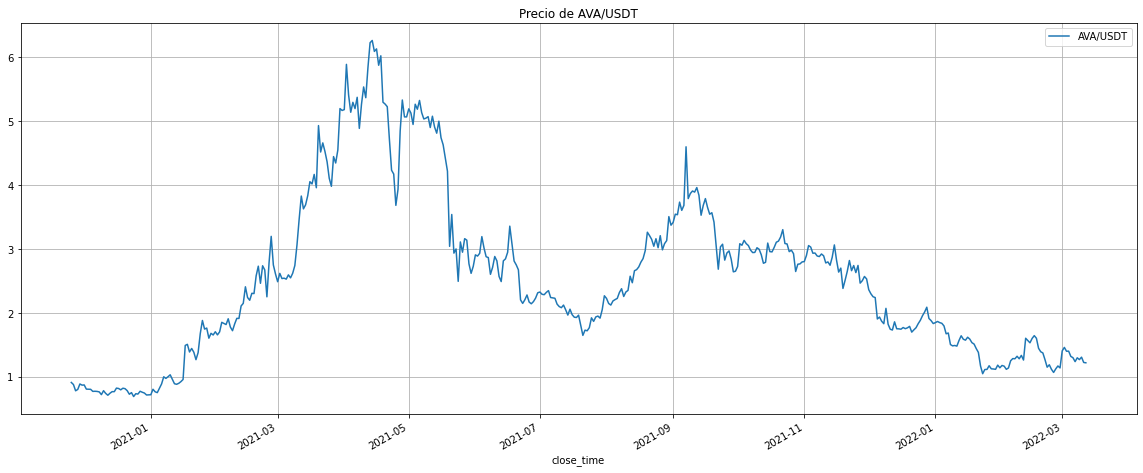

In [117]:
ava['close'].plot(figsize=(20,8), label='AVA/USDT')
plt.title('Precio de AVA/USDT')
plt.legend()
plt.grid()

In [145]:
symbol = 'BNBUSDT'
tick_interval = '1d'

In [146]:
def obtener_velas(start='', symbol='BNBUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [147]:
def obtener_velas_inicio(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

In [148]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
bnb = pd.DataFrame(velas, columns=columns)

In [149]:
bnb = bnb.sort_values('close_time')
bnb.drop_duplicates(keep='last')
bnb = bnb.astype(float)
bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 1586
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1587 non-null   float64
 1   open              1587 non-null   float64
 2   high              1587 non-null   float64
 3   low               1587 non-null   float64
 4   close             1587 non-null   float64
 5   volume            1587 non-null   float64
 6   close_time        1587 non-null   float64
 7   quote             1587 non-null   float64
 8   trades            1587 non-null   float64
 9   takers_buy_base   1587 non-null   float64
 10  takers_buy_quote  1587 non-null   float64
 11  ignore            1587 non-null   float64
dtypes: float64(12)
memory usage: 161.2 KB


In [150]:
bnb['close_time'] = pd.to_datetime(bnb['close_time'], unit='ms')
bnb['close_time'] = bnb['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
bnb = bnb.set_index('close_time')

In [151]:
bnb.drop('ignore', axis=1, inplace=True)

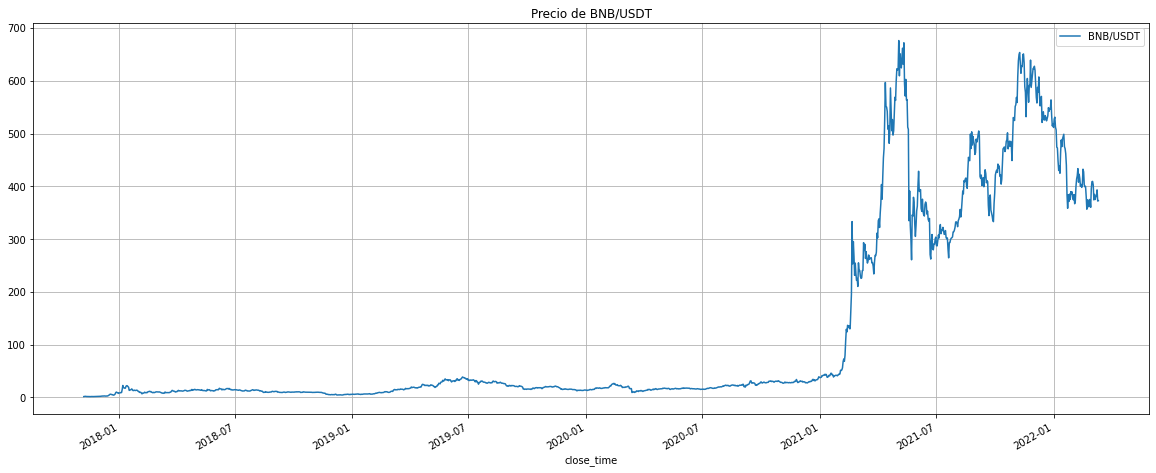

In [152]:
bnb['close'].plot(figsize=(20,8), label='BNB/USDT')
plt.title('Precio de BNB/USDT')
plt.legend()
plt.grid()

In [157]:
symbol = 'ADAUSDT'
tick_interval = '1d'

In [158]:
def obtener_velas(start='', symbol='ADAUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [159]:
def obtener_velas_inicio(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

In [160]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
cardano = pd.DataFrame(velas, columns=columns)

In [161]:
cardano = cardano.sort_values('close_time')
cardano.drop_duplicates(keep='last')
cardano = cardano.astype(float)
cardano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1425 non-null   float64
 1   open              1425 non-null   float64
 2   high              1425 non-null   float64
 3   low               1425 non-null   float64
 4   close             1425 non-null   float64
 5   volume            1425 non-null   float64
 6   close_time        1425 non-null   float64
 7   quote             1425 non-null   float64
 8   trades            1425 non-null   float64
 9   takers_buy_base   1425 non-null   float64
 10  takers_buy_quote  1425 non-null   float64
 11  ignore            1425 non-null   float64
dtypes: float64(12)
memory usage: 144.7 KB


In [162]:
cardano['close_time'] = pd.to_datetime(cardano['close_time'], unit='ms')
cardano['close_time'] = cardano['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
cardano = cardano.set_index('close_time')

In [163]:
cardano.drop('ignore', axis=1, inplace=True)

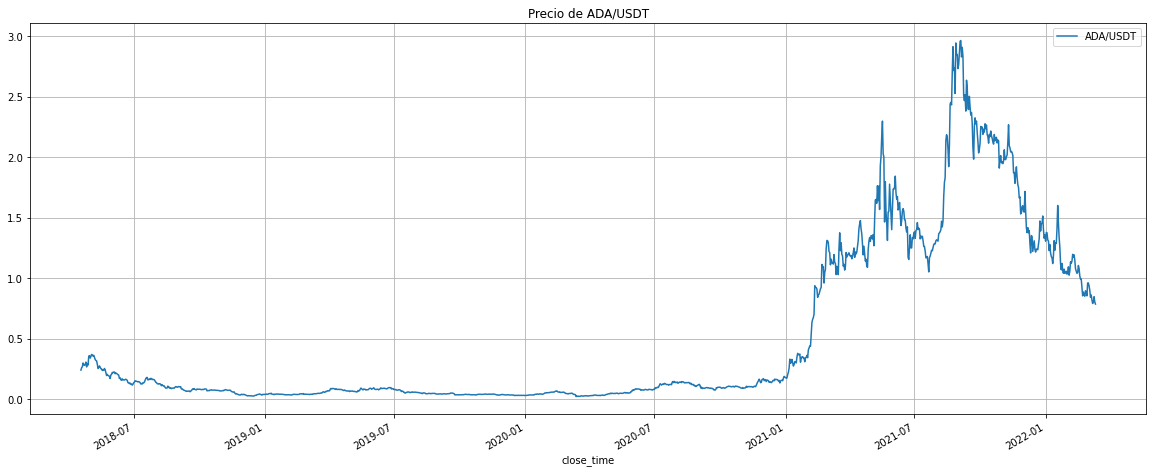

In [164]:
cardano['close'].plot(figsize=(20,8), label='ADA/USDT')
plt.title('Precio de ADA/USDT')
plt.legend()
plt.grid()

In [165]:
symbol = 'GALAUSDT'
tick_interval = '1d'

In [166]:
def obtener_velas(start='', symbol='GALAUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [167]:
def obtener_velas_inicio(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

In [168]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
gala = pd.DataFrame(velas, columns=columns)

In [169]:
gala = gala.sort_values('close_time')
gala.drop_duplicates(keep='last')
gala = gala.astype(float)
gala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         180 non-null    float64
 1   open              180 non-null    float64
 2   high              180 non-null    float64
 3   low               180 non-null    float64
 4   close             180 non-null    float64
 5   volume            180 non-null    float64
 6   close_time        180 non-null    float64
 7   quote             180 non-null    float64
 8   trades            180 non-null    float64
 9   takers_buy_base   180 non-null    float64
 10  takers_buy_quote  180 non-null    float64
 11  ignore            180 non-null    float64
dtypes: float64(12)
memory usage: 18.3 KB


In [170]:
gala['close_time'] = pd.to_datetime(gala['close_time'], unit='ms')
gala['close_time'] = gala['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
gala = gala.set_index('close_time')

In [171]:
gala.drop('ignore', axis=1, inplace=True)

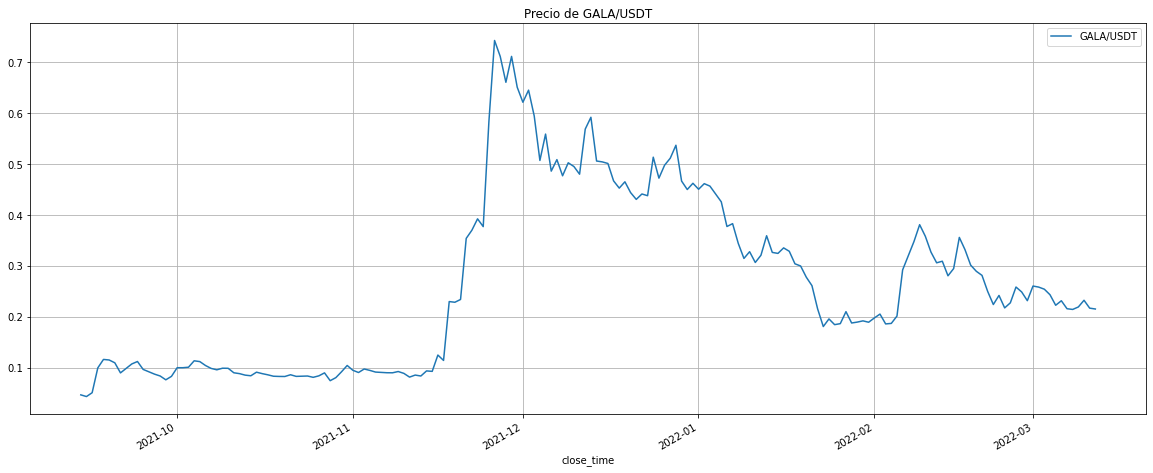

In [182]:
gala['close'].plot(figsize=(20,8), label='GALA/USDT')
plt.title('Precio de GALA/USDT')
plt.legend()
plt.grid()

In [173]:
symbol = 'ETHUSDT'
tick_interval = '1d'

In [174]:
def obtener_velas(start='', symbol='ETHUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [175]:
def obtener_velas_inicio(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

In [176]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
ethereum = pd.DataFrame(velas, columns=columns)

In [177]:
ethereum = ethereum.sort_values('close_time')
ethereum.drop_duplicates(keep='last')
ethereum = ethereum.astype(float)
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1666
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1667 non-null   float64
 1   open              1667 non-null   float64
 2   high              1667 non-null   float64
 3   low               1667 non-null   float64
 4   close             1667 non-null   float64
 5   volume            1667 non-null   float64
 6   close_time        1667 non-null   float64
 7   quote             1667 non-null   float64
 8   trades            1667 non-null   float64
 9   takers_buy_base   1667 non-null   float64
 10  takers_buy_quote  1667 non-null   float64
 11  ignore            1667 non-null   float64
dtypes: float64(12)
memory usage: 169.3 KB


In [178]:
ethereum['close_time'] = pd.to_datetime(ethereum['close_time'], unit='ms')
ethereum['close_time'] = ethereum['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
ethereum = ethereum.set_index('close_time')

In [179]:
ethereum.drop('ignore', axis=1, inplace=True)

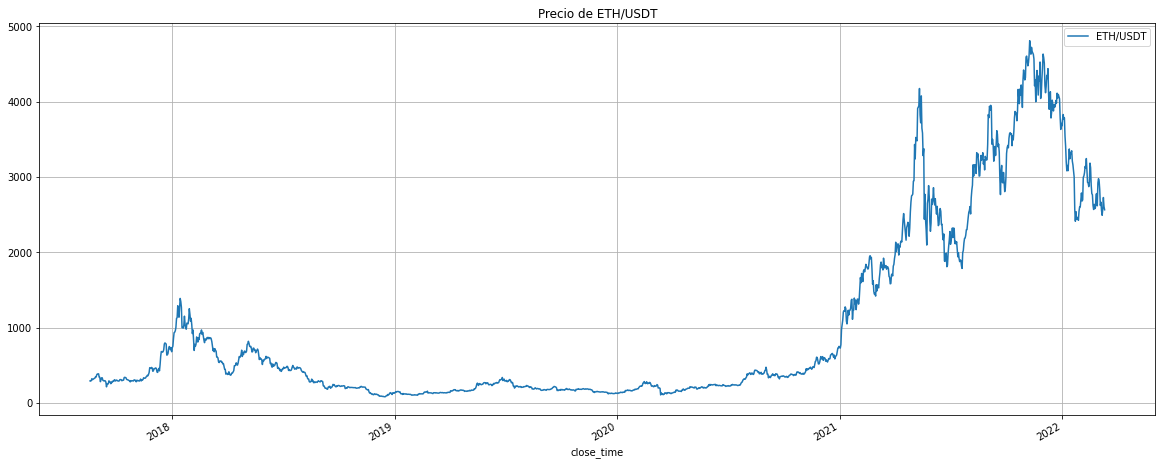

In [183]:
ethereum['close'].plot(figsize=(20,8), label='ETH/USDT')
plt.title('Precio de ETH/USDT')
plt.legend()
plt.grid()